# Extract Decennial Census Data

In [20]:
!pip3 install requests


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import requests
import pandas as pd

In [22]:
def base_url_func(year = "2000", dataset = "dec/sf1"):
    # Census API host name
    HOST = "https://api.census.gov/data"
    base_url = "/".join([HOST, year, dataset])

    return base_url

base_url = base_url_func()
print(f"Census Gov Data Base URL: {base_url}")

Census Gov Data Base URL: https://api.census.gov/data/2000/dec/sf1


In [23]:
# Specify Census variables and other predicates
get_vars = ["NAME", "P001001"]
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "county:*"
predicates["in"] = "state:02"

# Execute the request, examine text of response object
r = requests.get(base_url, params=predicates)

##### https://census.missouri.edu/geocodes/

![image.png](attachment:image.png)

In [24]:
r.text

'[["NAME","P001001","state","county"],\n["Aleutians East Borough, Alaska","2697","02","013"],\n["Aleutians West Census Area, Alaska","5465","02","016"],\n["Anchorage Municipality, Alaska","260283","02","020"],\n["Bethel Census Area, Alaska","16006","02","050"],\n["Bristol Bay Borough, Alaska","1258","02","060"],\n["Denali Borough, Alaska","1893","02","068"],\n["Dillingham Census Area, Alaska","4922","02","070"],\n["Fairbanks North Star Borough, Alaska","82840","02","090"],\n["Haines Borough, Alaska","2392","02","100"],\n["Juneau City and Borough, Alaska","30711","02","110"],\n["Kenai Peninsula Borough, Alaska","49691","02","122"],\n["Ketchikan Gateway Borough, Alaska","14070","02","130"],\n["Kodiak Island Borough, Alaska","13913","02","150"],\n["Lake and Peninsula Borough, Alaska","1823","02","164"],\n["Matanuska-Susitna Borough, Alaska","59322","02","170"],\n["Nome Census Area, Alaska","9196","02","180"],\n["North Slope Borough, Alaska","7385","02","185"],\n["Northwest Arctic Borough,

In [25]:
population_df = pd.DataFrame(data = r.json()[1:], columns = ["NAME", "POPULATION", "STATE_CODE","COUNTY"])

In [26]:
population_df

,NAME,POPULATION,STATE_CODE,COUNTY
0,"Aleutians East Borough, Alaska",2697,02,013
1,"Aleutians West Census Area, Alaska",5465,02,016
2,"Anchorage Municipality, Alaska",260283,02,020
3,"Bethel Census Area, Alaska",16006,02,050
4,"Bristol Bay Borough, Alaska",1258,02,060
5,"Denali Borough, Alaska",1893,02,068
6,"Dillingham Census Area, Alaska",4922,02,070
7,"Fairbanks North Star Borough, Alaska",82840,02,090
8,"Haines Borough, Alaska",2392,02,100
9,"Juneau City and Borough, Alaska",30711,02,110


# Exploration 2020 DataSet

In [27]:
def base_url_func(year = "2010", dataset = "dec/sf1"):
    # Census API host name
    HOST = "https://api.census.gov/data"
    base_url = "/".join([HOST, year, dataset])

    return base_url

base_url = base_url_func(year = "2020", dataset = "dec/ddhca")
print(f"Census Gov Data Base URL: {base_url}")

Census Gov Data Base URL: https://api.census.gov/data/2020/dec/ddhca


In [28]:
# Specify Census variables and other predicates
get_vars = ["NAME","POPGROUP","T01001_001N","T02001_002N","T02001_007N"]
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "county:*"
predicates["in"] = "state:02"
predicates["key"] = "1e4b8c1715da9e2f6f845ff970bcec86e22efd86"

# Execute the request, examine text of response object
r = requests.get(base_url, params=predicates)
print(base_url)
print(f"Status Code:{r}")

https://api.census.gov/data/2020/dec/ddhca
Status Code:<Response [200]>


In [29]:
r.json()

[['NAME',
  'POPGROUP',
  'T01001_001N',
  'T02001_002N',
  'T02001_007N',
  'state',
  'county'],
 ['Aleutians East Borough, Alaska', '1002', '361', None, None, '02', '013'],
 ['Aleutians East Borough, Alaska', '1024', '36', None, None, '02', '013'],
 ['Aleutians East Borough, Alaska', '1031', '27', None, None, '02', '013'],
 ['Aleutians East Borough, Alaska', '1059', '29', None, None, '02', '013'],
 ['Aleutians East Borough, Alaska',
  '1067',
  '-888888888',
  None,
  None,
  '02',
  '013'],
 ['Aleutians East Borough, Alaska', '1100', '342', None, None, '02', '013'],
 ['Aleutians East Borough, Alaska', '1111', '320', None, None, '02', '013'],
 ['Aleutians East Borough, Alaska', '1113', '419', None, None, '02', '013'],
 ['Aleutians East Borough, Alaska', '1132', '22', None, None, '02', '013'],
 ['Aleutians East Borough, Alaska', '1135', '62', None, None, '02', '013'],
 ['Aleutians East Borough, Alaska', '1142', '50', None, None, '02', '013'],
 ['Aleutians East Borough, Alaska', '1146

In [30]:
data = pd.DataFrame(data = r.json()[1:], columns =
                    ['NAME', 'POPGROUP', 'Total Population','Male Population','Female Population','state', 'county'])

In [97]:
data

,NAME,POPGROUP,Total Population,Male Population,Female Population,state,county
0,"Aleutians East Borough, Alaska",1002,361,None,None,02,013
1,"Aleutians East Borough, Alaska",1024,36,None,None,02,013
2,"Aleutians East Borough, Alaska",1031,27,None,None,02,013
3,"Aleutians East Borough, Alaska",1059,29,None,None,02,013
4,"Aleutians East Borough, Alaska",1067,-888888888,None,None,02,013
...,...,...,...,...,...,...,...
3108,"Yukon-Koyukuk Census Area, Alaska",2824,172,None,None,02,290
3109,"Yukon-Koyukuk Census Area, Alaska",2830,79,None,None,02,290
3110,"Yukon-Koyukuk Census Area, Alaska",2831,516,None,None,02,290
3111,"Yukon-Koyukuk Census Area, Alaska",3762,60,None,None,02,290


In [31]:
base_url = base_url_func(year = "2020", dataset = "dec/ddhcb")
print(f"Census Gov Data Base URL: {base_url}")

predicates = {
    "get":"NAME,POPGROUP,T03001_001N,T03002_002N,T03002_003N",
    "ucgid": "pseudo(0400000US02$0500000)",
    "key": "1e4b8c1715da9e2f6f845ff970bcec86e22efd86"
}
# Execute the request
r = requests.get(base_url, params=predicates)

# Output results
print(f"Status Code: {r.status_code}")
print("Response Text:", r.text)

Census Gov Data Base URL: https://api.census.gov/data/2020/dec/ddhcb
Status Code: 200
Response Text: [["NAME","POPGROUP","T03001_001N","T03002_002N","T03002_003N","ucgid"],
["Aleutians East Borough, Alaska","1002","51",null,null,"0500000US02013"],
["Aleutians East Borough, Alaska","1024","11",null,null,"0500000US02013"],
["Aleutians East Borough, Alaska","1031","-888888888",null,null,"0500000US02013"],
["Aleutians East Borough, Alaska","1059","-888888888",null,null,"0500000US02013"],
["Aleutians East Borough, Alaska","1067","-888888888",null,null,"0500000US02013"],
["Aleutians East Borough, Alaska","1100","-888888888",null,null,"0500000US02013"],
["Aleutians East Borough, Alaska","1111","46",null,null,"0500000US02013"],
["Aleutians East Borough, Alaska","1113","54",null,null,"0500000US02013"],
["Aleutians East Borough, Alaska","1132","1",null,null,"0500000US02013"],
["Aleutians East Borough, Alaska","1135","13",null,null,"0500000US02013"],
["Aleutians East Borough, Alaska","1142","8",n

In [32]:
data = pd.DataFrame(data = r.json()[1:], columns =
                    ['NAME', 'POPGROUP','Household type total','family household type','non-family household type','ucgid'])
data = data.drop(columns=['ucgid'])
data

,NAME,POPGROUP,Household type total,family household type,non-family household type
0,"Aleutians East Borough, Alaska",1002,51,None,None
1,"Aleutians East Borough, Alaska",1024,11,None,None
2,"Aleutians East Borough, Alaska",1031,-888888888,None,None
3,"Aleutians East Borough, Alaska",1059,-888888888,None,None
4,"Aleutians East Borough, Alaska",1067,-888888888,None,None
...,...,...,...,...,...
2840,"Yukon-Koyukuk Census Area, Alaska",2824,85,None,None
2841,"Yukon-Koyukuk Census Area, Alaska",2830,28,None,None
2842,"Yukon-Koyukuk Census Area, Alaska",2831,219,None,None
2843,"Yukon-Koyukuk Census Area, Alaska",3762,13,None,None


Exploring 2023 dataset


2023 acs data: Population by sex

In [64]:
base_url = base_url_func(year = "2023", dataset = "acs/acsse")
print(f"Census Gov Data Base URL: {base_url}")

Census Gov Data Base URL: https://api.census.gov/data/2023/acs/acsse


In [65]:
# Define parameters
predicates = {
    "get": "GEO_ID,NAME,K200101_001E,K200101_002E,K200101_003E,K200201_001E,K200201_002E,K200201_003E,K200201_004E,K200201_005E,K200201_006E,K200201_007E,K200201_008E,K201501_001E,K201501_002E,K201501_003E,K201501_004E,K201501_005E,K201501_006E,K201501_007E,K201501_008E,K201901_001E,K201901_002E,K201901_003E,K201901_004E,K201901_005E,K201901_006E,K201901_007E,K201901_008E",
    "ucgid": "pseudo(0400000US02$0500000)",
    "key": "1e4b8c1715da9e2f6f845ff970bcec86e22efd86"
}
# Execute the request
r = requests.get(base_url, params=predicates)

# Output results
print(f"Status Code: {r.status_code}")
print("Response Text:", r.text)


Status Code: 200
Response Text: [["GEO_ID","NAME","K200101_001E","K200101_002E","K200101_003E","K200201_001E","K200201_002E","K200201_003E","K200201_004E","K200201_005E","K200201_006E","K200201_007E","K200201_008E","K201501_001E","K201501_002E","K201501_003E","K201501_004E","K201501_005E","K201501_006E","K201501_007E","K201501_008E","K201901_001E","K201901_002E","K201901_003E","K201901_004E","K201901_005E","K201901_006E","K201901_007E","K201901_008E","ucgid"],
["0500000US02020","Anchorage Municipality, Alaska","286075","146838","139237","286075","161986","14367","21597","26597","8802","10630","42096","193169","5062","7097","45755","44185","13827","46863","30380","109125","7690","10585","11502","27350","20200","12020","19778","0500000US02020"],
["0500000US02090","Fairbanks North Star Borough, Alaska","94840","52265","42575","94840","65673","2908","7179","1754","361","2165","14800","61164","1526","2129","16349","15317","6239","11808","7796","37510","3491","5401","3941","8521","8257","396

In [66]:
data = pd.DataFrame(data = r.json()[1:], columns =
                    ['GEO_ID',
  'NAME',
  'Population total Estimate',
  'Population Male estimate',
  'Population Female estimate','Race total estimate','white alone estimate','Black or African American alone estimate', 'American Indian and alaska native alone', 'Asian alone estimate','Native Hawaiian and Other Pacific Islander alone estimate', 'Some other race alone estimate', 'Two or more races estimate','education estimate','less than 9th grade','9th to 12th no diploma','high school graduate','some college no degree', 'Associate degree','bachelors degree','graduate or professional degree',
   'total household income estimate','less than $20,000 estimate','$20,000 to $39,000 estimate','$40,000 to $59,000 estimate','$60,000 to $99,999 estimate','$100,000 to $149000 estimate','$150000 to $199,999 estimate','$200,000 or more estimate',
  'ucgid'])
data = data.drop(columns=['GEO_ID','ucgid'])

In [67]:
data

,NAME,Population total Estimate,Population Male estimate,Population Female estimate,Race total estimate,white alone estimate,Black or African American alone estimate,American Indian and alaska native alone,Asian alone estimate,Native Hawaiian and Other Pacific Islander alone estimate,...,bachelors degree,graduate or professional degree,total household income estimate,"less than $20,000 estimate","$20,000 to $39,000 estimate","$40,000 to $59,000 estimate","$60,000 to $99,999 estimate","$100,000 to $149000 estimate","$150000 to $199,999 estimate","$200,000 or more estimate"
0,"Anchorage Municipality, Alaska",286075,146838,139237,286075,161986,14367,21597,26597,8802,...,46863,30380,109125,7690,10585,11502,27350,20200,12020,19778
1,"Fairbanks North Star Borough, Alaska",94840,52265,42575,94840,65673,2908,7179,1754,361,...,11808,7796,37510,3491,5401,3941,8521,8257,3963,3936
2,"Juneau City and Borough, Alaska",31555,15478,16077,31555,19463,57,3364,1912,39,...,5423,2750,13368,1423,643,2534,2682,3278,1117,1691
3,"Kenai Peninsula Borough, Alaska",61223,31690,29533,61223,48573,319,3069,1177,72,...,8371,4349,25829,3540,3523,3850,6029,4265,2284,2338
4,"Matanuska-Susitna Borough, Alaska",115239,60843,54396,115239,87910,1073,6810,1822,73,...,12636,7711,39870,3939,4900,4374,8439,8039,5199,4980


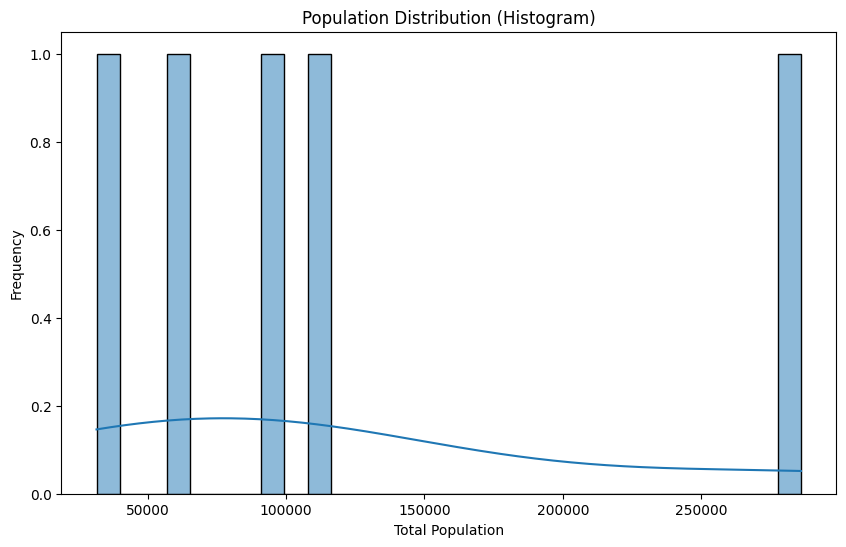

In [46]:
data['Population by Sex total Estimate'] = pd.to_numeric(data['Population by Sex total Estimate'], errors='coerce')

# Drop any rows with NaN in the 'Population by Sex total Estimate' column (optional)
data = data.dropna(subset=['Population by Sex total Estimate'])

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Population by Sex total Estimate'], bins=30, kde=True)  # kde=True adds a density estimate
plt.title('Population Distribution (Histogram)')
plt.xlabel('Total Population')
plt.ylabel('Frequency')
plt.show()

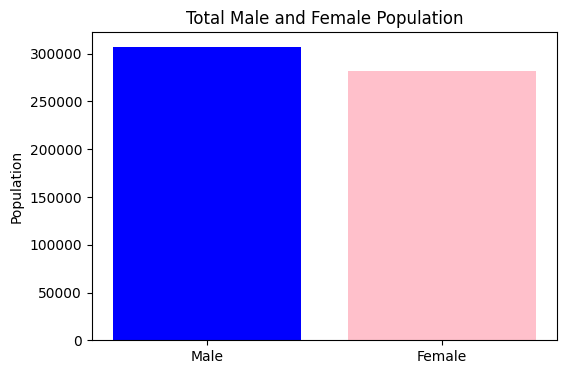

In [47]:
# Convert columns to numeric if needed
data['Population Male estimate'] = pd.to_numeric(data['Population Male estimate'], errors='coerce')
data['Population Female estimate'] = pd.to_numeric(data['Population Female estimate'], errors='coerce')

# Sum male and female populations across all counties
total_male = data['Population Male estimate'].sum()
total_female = data['Population Female estimate'].sum()

# Bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Male', 'Female'], [total_male, total_female], color=['blue', 'pink'])
plt.title('Total Male and Female Population')
plt.ylabel('Population')
plt.show()


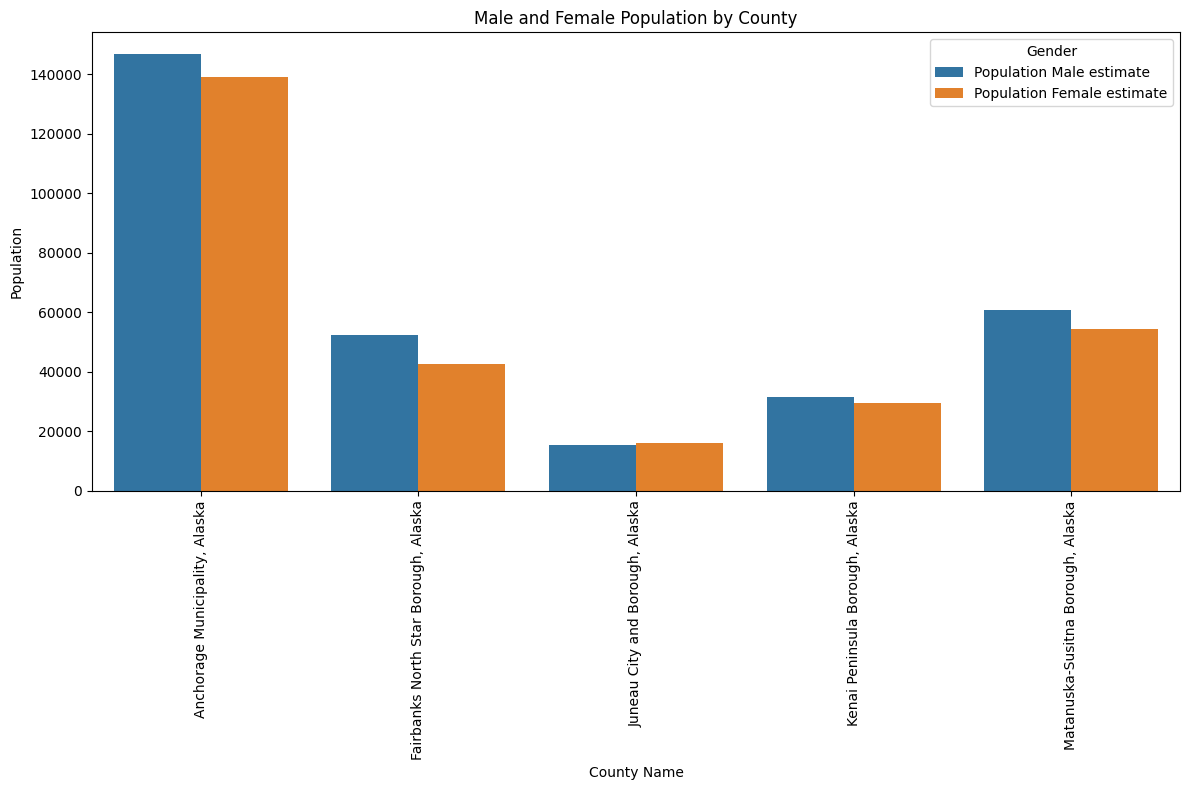

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the DataFrame 'data' is already defined as per your structure

# Convert population columns to numeric, if necessary
data['Population Male estimate'] = pd.to_numeric(data['Population Male estimate'], errors='coerce')
data['Population Female estimate'] = pd.to_numeric(data['Population Female estimate'], errors='coerce')

# Drop any rows with NaN in the population columns
data = data.dropna(subset=['Population Male estimate', 'Population Female estimate'])

# Melt the DataFrame for easier plotting
data_melted = data.melt(id_vars=['NAME'], 
                         value_vars=['Population Male estimate', 'Population Female estimate'],
                         var_name='Gender', 
                         value_name='Population')

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(x='NAME', y='Population', hue='Gender', data=data_melted)

# Customize the plot
plt.title('Male and Female Population by County')
plt.xlabel('County Name')
plt.ylabel('Population')
plt.xticks(rotation=90)  # Rotate county names for better visibility
plt.legend(title='Gender')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\krishna\AppData\Local\Temp\ipykernel_25612\3180252077.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Degree', y='Count', data=education_summary, palette='viridis')


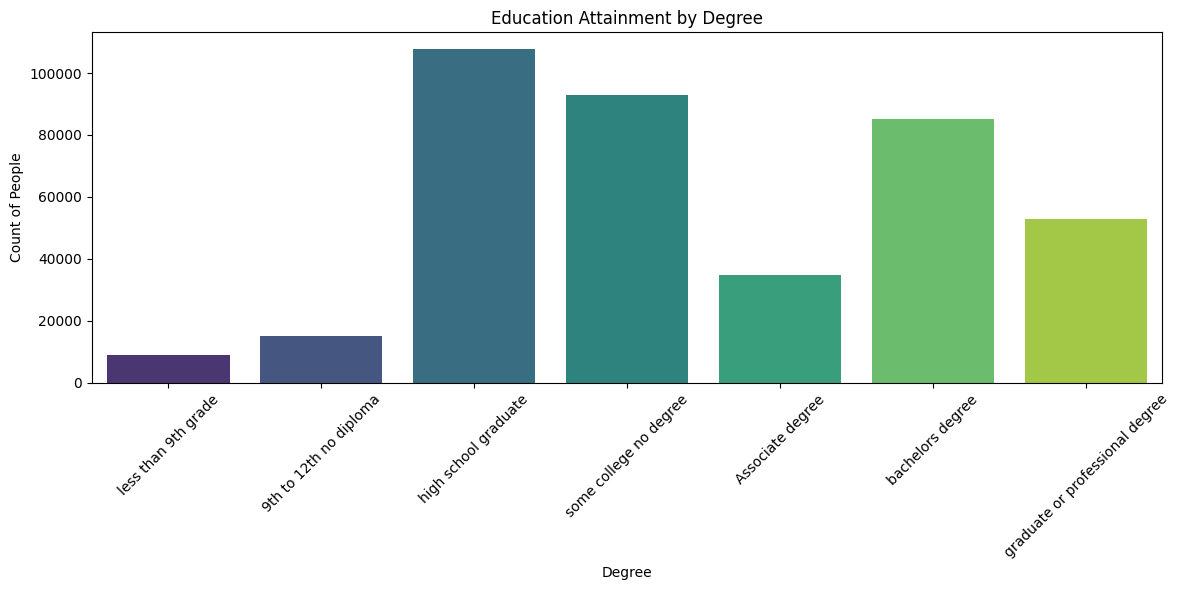

In [54]:

# Define the columns related to education attainment
education_columns = [
    'less than 9th grade',
    '9th to 12th no diploma',
    'high school graduate',
    'some college no degree',
    'Associate degree',
    'bachelors degree',
    'graduate or professional degree'
]

# Convert education attainment columns to numeric, if necessary
for col in education_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Sum the counts for each education level
education_summary = data[education_columns].sum().reset_index()
education_summary.columns = ['Degree', 'Count']

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='Degree', y='Count', data=education_summary, palette='viridis')

# Customize the plot
plt.title('Education Attainment by Degree')
plt.xlabel('Degree')
plt.ylabel('Count of People')
plt.xticks(rotation=45)  # Rotate degree names for better visibility

# Show the plot
plt.tight_layout()
plt.show()


In [55]:
data_2023 = data

# **ACS 5 year estimate**

In [38]:
base_url = base_url_func(year = "2022", dataset = "acs/acs5/profile")
print(f"Census Gov Data Base URL: {base_url}")

# Define parameters
predicates = {
    "get": "GEO_ID,NAME,DP02_0059E,DP02_0060E,DP02_0061E,DP02_0062E,DP02_0063E,DP02_0064E,DP02_0065E,DP02_0066E,DP02_0067E,DP02_0068E,DP03_0051E,DP03_0052E,DP03_0053E,DP03_0054E,DP03_0055E,DP03_0056E,DP03_0057E,DP03_0058E,DP03_0059E,DP03_0060E,DP03_0061E",
    "for": "COUNTY:*",
    "in":"state:02",
    "ucgid": "pseudo(0400000US02$0500000)",
    "key": "1e4b8c1715da9e2f6f845ff970bcec86e22efd86"
}
# Execute the request
r = requests.get(base_url, params=predicates)

# Output results
print(f"Status Code: {r.status_code}")
print("Response Text:", r.text)


Census Gov Data Base URL: https://api.census.gov/data/2022/acs/acs5/profile
Status Code: 200
Response Text: [["GEO_ID","NAME","DP02_0059E","DP02_0060E","DP02_0061E","DP02_0062E","DP02_0063E","DP02_0064E","DP02_0065E","DP02_0066E","DP02_0067E","DP02_0068E","DP03_0051E","DP03_0052E","DP03_0053E","DP03_0054E","DP03_0055E","DP03_0056E","DP03_0057E","DP03_0058E","DP03_0059E","DP03_0060E","DP03_0061E","ucgid"],
["0500000US02013","Aleutians East Borough, Alaska","2675","262","246","1053","499","162","339","114","2167","453","899","36","19","95","54","77","126","134","220","110","28","0500000US02013"],
["0500000US02016","Aleutians West Census Area, Alaska","3861","241","163","1596","974","291","508","88","3457","596","969","12","10","27","38","59","115","219","264","101","124","0500000US02016"],
["0500000US02020","Anchorage Municipality, Alaska","192454","3986","7216","47155","46340","16483","44340","26934","181252","71274","107134","3507","1997","5224","5438","8943","15589","15228","21969","1

In [14]:
base_url = base_url_func(year = "2022", dataset = "acs/acs5/subject")
print(f"Census Gov Data Base URL: {base_url}")

# Define parameters
predicates = {
    "get": "GEO_ID,NAME,S0101_C01_001E,S0101_C03_001E,S0101_C05_001E",
    "for": "COUNTY:*",
    "in":"state:02",
    "ucgid": "pseudo(0400000US02$0500000)",
    "key": "1e4b8c1715da9e2f6f845ff970bcec86e22efd86"
}
# Execute the request
r1 = requests.get(base_url, params=predicates)

# Output results
print(f"Status Code: {r.status_code}")
print("Response Text:", r.text)

Census Gov Data Base URL: https://api.census.gov/data/2022/acs/acs5/subject
Status Code: 200
Response Text: [["GEO_ID","NAME","DP02_0059E","DP02_0060E","DP02_0061E","DP02_0062E","DP02_0063E","DP02_0064E","DP02_0065E","DP02_0066E","DP02_0067E","DP02_0068E","DP03_0051E","DP03_0052E","DP03_0053E","DP03_0054E","DP03_0055E","DP03_0056E","DP03_0057E","DP03_0058E","DP03_0059E","DP03_0060E","DP03_0061E","ucgid"],
["0500000US02013","Aleutians East Borough, Alaska","2675","262","246","1053","499","162","339","114","2167","453","899","36","19","95","54","77","126","134","220","110","28","0500000US02013"],
["0500000US02016","Aleutians West Census Area, Alaska","3861","241","163","1596","974","291","508","88","3457","596","969","12","10","27","38","59","115","219","264","101","124","0500000US02016"],
["0500000US02020","Anchorage Municipality, Alaska","192454","3986","7216","47155","46340","16483","44340","26934","181252","71274","107134","3507","1997","5224","5438","8943","15589","15228","21969","1

In [40]:
data1 = pd.DataFrame(data = r1.json()[1:], columns =
                    ['GEO_ID','NAME','Population total Estimate',
  'Population Male estimate',
  'Population Female estimate',
  'ucgid'])
data1 = data1.drop(columns=['GEO_ID','ucgid'])
data1

,NAME,Population total Estimate,Population Male estimate,Population Female estimate
0,"Aleutians East Borough, Alaska",3407,2102,1305
1,"Aleutians West Census Area, Alaska",5219,3484,1735
2,"Anchorage Municipality, Alaska",290674,149144,141530
3,"Bethel Census Area, Alaska",18538,9909,8629
4,"Bristol Bay Borough, Alaska",854,489,365
5,"Chugach Census Area, Alaska",7000,3717,3283
6,"Copper River Census Area, Alaska",2614,1388,1226
7,"Denali Borough, Alaska",2101,1417,684
8,"Dillingham Census Area, Alaska",4854,2492,2362
9,"Fairbanks North Star Borough, Alaska",96299,52279,44020


In [16]:
"""Population by Sex total Estimate',
  'Population Male estimate',
  'Population Female estimate','Race total estimate','white alone estimate','Black or African American alone estimate', 'American Indian and alaska native alone', 'Asian alone estimate','Native Hawaiian and Other Pacific Islander alone estimate', 'Some other race alone estimate', 'Two or more races estimate',"""

data = pd.DataFrame(data = r.json()[1:], columns =
                    ['GEO_ID',
  'NAME','education estimate','less than 9th grade','9th to 12th no diploma','high school graduate','some college no degree', 'Associate degree','bachelors degree','graduate or professional degree',
  'high school graduate or higher','bachelors degree or higher','total household income estimate','less than $10000 income estimate','$10,000 to $14999 estimate','$15,000 to $24999 estimate','$25000 to $34999 estimate','$35,000 to $49,999 estimate','$50,000 to $74999 estimate','$75000 to $99,999 estimate','$100,000 to $ 149,999 estimate','$150,000 to $200,000 estimate','$200,000 or higher estimate','ucgid'])
data = data.drop(columns=['GEO_ID','ucgid'])
data

,NAME,education estimate,less than 9th grade,9th to 12th no diploma,high school graduate,some college no degree,Associate degree,bachelors degree,graduate or professional degree,high school graduate or higher,...,less than $10000 income estimate,"$10,000 to $14999 estimate","$15,000 to $24999 estimate",$25000 to $34999 estimate,"$35,000 to $49,999 estimate","$50,000 to $74999 estimate","$75000 to $99,999 estimate","$100,000 to $ 149,999 estimate","$150,000 to $200,000 estimate","$200,000 or higher estimate"
0,"Aleutians East Borough, Alaska",2675,262,246,1053,499,162,339,114,2167,...,36,19,95,54,77,126,134,220,110,28
1,"Aleutians West Census Area, Alaska",3861,241,163,1596,974,291,508,88,3457,...,12,10,27,38,59,115,219,264,101,124
2,"Anchorage Municipality, Alaska",192454,3986,7216,47155,46340,16483,44340,26934,181252,...,3507,1997,5224,5438,8943,15589,15228,21969,13795,15444
3,"Bethel Census Area, Alaska",10109,635,1110,4838,1808,738,532,448,8364,...,344,199,405,410,499,774,495,649,452,338
4,"Bristol Bay Borough, Alaska",636,13,19,180,203,54,139,28,604,...,2,4,15,22,24,54,31,61,33,38
5,"Chugach Census Area, Alaska",4929,88,181,1172,1368,569,1001,550,4660,...,14,124,80,169,294,538,382,601,241,312
6,"Copper River Census Area, Alaska",1791,37,99,521,517,114,341,162,1655,...,34,49,121,72,75,221,122,264,45,87
7,"Denali Borough, Alaska",1674,19,37,784,273,140,229,192,1618,...,18,11,70,18,36,68,94,65,107,38
8,"Dillingham Census Area, Alaska",2902,120,225,1206,567,190,329,265,2557,...,51,60,106,101,178,233,201,233,145,76
9,"Fairbanks North Star Borough, Alaska",61350,1138,2133,15512,16407,5948,12039,8173,58079,...,1276,885,1731,1797,3841,6778,5088,6319,3541,4568


In [57]:
#data = pd.concat([data1, data], axis=1, ignore_index=True)
# Stack rows
# Drop duplicated columns after concatenation
data_2022 = pd.concat([data1, data], axis=1)
data_2022 = data_2022.loc[:, ~data_2022.columns.duplicated()]

data_2022

,NAME,Population total Estimate,Population Male estimate,Population Female estimate,Population by Sex total Estimate,Race total estimate,white alone estimate,Black or African American alone estimate,American Indian and alaska native alone,Asian alone estimate,...,bachelors degree,graduate or professional degree,total household income estimate,"less than $20,000 estimate","$20,000 to $39,000 estimate","$40,000 to $59,000 estimate","$60,000 to $99,999 estimate","$100,000 to $149000 estimate","$150000 to $199,999 estimate","$200,000 or more estimate"
0,"Aleutians East Borough, Alaska",3407,2102,1305,286075.0,286075,161986,14367,21597,26597,...,46863.0,30380.0,109125,7690,10585,11502,27350,20200,12020,19778
1,"Aleutians West Census Area, Alaska",5219,3484,1735,94840.0,94840,65673,2908,7179,1754,...,11808.0,7796.0,37510,3491,5401,3941,8521,8257,3963,3936
2,"Anchorage Municipality, Alaska",290674,149144,141530,31555.0,31555,19463,57,3364,1912,...,5423.0,2750.0,13368,1423,643,2534,2682,3278,1117,1691
3,"Bethel Census Area, Alaska",18538,9909,8629,61223.0,61223,48573,319,3069,1177,...,8371.0,4349.0,25829,3540,3523,3850,6029,4265,2284,2338
4,"Bristol Bay Borough, Alaska",854,489,365,115239.0,115239,87910,1073,6810,1822,...,12636.0,7711.0,39870,3939,4900,4374,8439,8039,5199,4980
5,"Chugach Census Area, Alaska",7000,3717,3283,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Copper River Census Area, Alaska",2614,1388,1226,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Denali Borough, Alaska",2101,1417,684,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Dillingham Census Area, Alaska",4854,2492,2362,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Fairbanks North Star Borough, Alaska",96299,52279,44020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data.to_csv('ACS_2022_5year_estimate.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data_2022 and data_2023 are your DataFrames containing the relevant population data
# Make sure to rename your population columns if they differ

# Example population columns names
# For the sake of this example, let's say:
# data_2022 contains 'Population total Estimate'
# data_2023 contains 'Population by Sex total Estimate'

# Merging the two DataFrames on the 'NAME' column
merged_data = pd.merge(data_2022, data_2023, on='NAME', suffixes=('_2022', '_2023'))

# Calculating the population difference
merged_data['Population Difference'] = merged_data['Population total Estimate'] - merged_data['Population total Estimate']

# Plotting the results
plt.figure(figsize=(14, 6))
merged_data.plot(kind='bar', x='NAME', y='Population Difference', color='skyblue')
plt.title('Population Difference Between 2022 and 2023 by County')
plt.xlabel('County')
plt.ylabel('Population Difference')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
